### TODO List:
To prepare the data, following the needs identified before, with respect to:
- Encoding.
- Missing value imputation.
- Outliers treatment.
- Scaling.
- Balancing.
- Feature selection and generation.

For each preparation task:
1. Pick the dataset and split it into two datasets: one for training and another for testing.
1. For each preparation task, choose two different approaches and apply them to the training
dataset. Then apply the adequate transformation to the testing set, when necessary.
1. Train a KNN and a Naïve Bayes model for each resulting dataset.
1. Compare the performance of both Naïve Bayes and both KNN models and select the dataset
that yields the best performance.
1. Pick this dataset to proceed to the next preparation task.

[Lab functions documentation](https://web.ist.utl.pt/~claudia.antunes/DSLabs/)

[Dataset description](https://www.kaggle.com/datasets/oktayrdeki/traffic-accidents)

#### Methodology

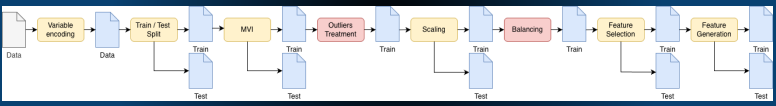

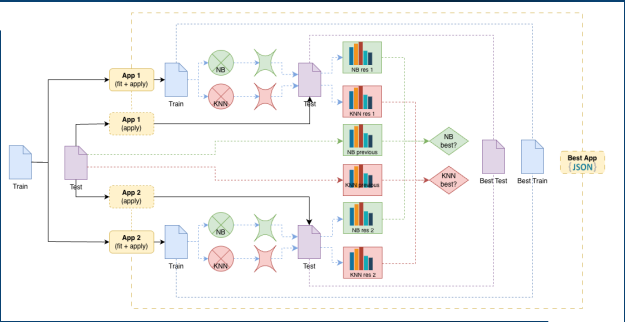

#### Encoding
Ordinal enconding:
- damage
- most_severe_injury
- weather_condition
- lighting_condition
- roadway_surface_cond

One-hot encoding:
- alignment
- traffic_control_device
- trafficway_type
- road_defect
- prim_contributory_cause
- first_crash_type

Cyclic encoding:
- crash_date_year
- crash_date_quarter
- crash_date_month
- crash_date_day

#### Missing Values
No need because there are no missing values

#### Outliers
- Dropping outliers
- Replacing outliers with fixed value (p99)
- Truncating outliers


#### Best strategies:
- Encoding
    - TODO
- Outliers
    - fixed (median)
- Scaling
    - NB: minmax
    - KNN: zscore

In [1]:
from main_ta import *

In [24]:
sample = True
flag_outliers = False
flag_scaling = True
flag_balancing = False
flag_feature_sel = True
filename = "data/traffic_accidents.csv"
target = "crash_type"
file_tag = "test"
outlier_strategy = "fixed"
scaling_strategy = "zscore"
balancing_strategy = "under"
feature_sel_strategy = "lowvar"
max_threshold = 0.45
min_threshold = 0.45
random_state = 42

In [5]:
def evaluate_approach(train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy") -> dict[str, list]:
    train_cp = train.copy()
    test_cp = test.copy()
    trnY = train_cp.pop(target).values
    trnX: ndarray = train_cp.values
    tstY = test_cp.pop(target).values
    tstX: ndarray = test_cp.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]

    return eval

def evaluate(train_df: DataFrame, test_df: DataFrame, file_tag: str, target: str, strategies: list[str], label: str):
    strategy_names = ["Outlier handling", "Data scaling", "Data balancing", "Feature selection"]
    print("Evaluating approach for the following configuration:")
    title_label = ""
    for i, strategy in enumerate(strategies):
        if strategy:
            print(f"{strategy_names[i]} - {strategy} strategy")
            if strategy == "fixed":
                title_label = "(replacing outliers)"
            if strategy == "truncate":
                title_label = "(truncating outliers)"
            if strategy == "zscore":
                title_label = "(scaling z-score)"
            if strategy == "minmax":
                title_label = "(scaling min-max)"        
            if strategy == "under":
                title_label = "(underbalancing)"
            if strategy == "over":
                title_label = "(overbalancing)"    
            if strategy == "smote":
                title_label = "(smote)" 
            if strategy == "lowvar":
                title_label = "(low variance)" 
            if strategy == "redundant":
                title_label = "(redundant)" 

    eval: dict[str, list] = evaluate_approach(train_df, test_df, target=target, metric="recall")
    figure()
    plot_multibar_chart(["NB", "KNN"], eval, title=f"{file_tag} evaluation {title_label}", percentage=True)
    savefig(f"images/{file_tag}_eval{label}.png")

## Load Dataset

In [6]:
df = load_dataset(filename, sample=sample, random_state=random_state)
vars: dict[str, list] = get_variable_types(df)
for var in vars:
    print(f'{var} variables: {vars[var]}')
for c in vars["symbolic"]:
    print(f'"{c}" has {len(df[c].unique())} distinct values: {df[c].unique()}')

Loading dataset from data/traffic_accidents.csv...
Sampling 30% of the dataset for quicker processing...
Column crash_hour seems numeric but is actually symbolic.
Column crash_day_of_week seems numeric but is actually symbolic.
Column crash_month seems numeric but is actually symbolic.
numeric variables: ['num_units', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication']
binary variables: ['crash_type', 'intersection_related_i']
date variables: ['crash_date']
symbolic variables: ['traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'damage', 'prim_contributory_cause', 'most_severe_injury', 'crash_hour', 'crash_day_of_week', 'crash_month']
"traffic_control_device" has 19 distinct values: ['TRAFFIC SIGNAL' 'NO CONTROLS' 'OTHER' 'STOP SIGN/FLASHER' 'UNKNOWN'
 'FLASHING CONTROL SIGNAL' '

In [7]:
df = data_cleaning(df, vars)
vars: dict[str, list] = get_variable_types(df)
for var in vars:
    print(f'{var} variables: {vars[var]}')
for c in vars["symbolic"]:
    print(f'"{c}" has {len(df[c].unique())} distinct values: {df[c].unique()}')

=== Performing data cleaning ===
Column crash_hour seems numeric but is actually symbolic.
Column crash_day_of_week seems numeric but is actually symbolic.
Column crash_date_year seems numeric but is actually symbolic.
Column crash_date_quarter seems numeric but is actually symbolic.
Column crash_date_month seems numeric but is actually symbolic.
Column crash_date_day seems numeric but is actually symbolic.
numeric variables: ['num_units']
binary variables: ['crash_type', 'intersection_related_i']
date variables: []
symbolic variables: ['traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'prim_contributory_cause', 'crash_hour', 'crash_day_of_week', 'crash_date_year', 'crash_date_quarter', 'crash_date_month', 'crash_date_day']
"traffic_control_device" has 5 distinct values: ['TRAFFIC SIGNAL' 'NO CONTROLS' 'OTHERS' 'STOP SIGN/FLASHER' 'UNKNOWN']
"weather_condition" has 6 distinct v

## Encoding

In [8]:
df = data_encoding(df, file_tag)
train_df, test_df = split_train_test_data(df)
strategies = [outlier_strategy if flag_outliers else None,
                scaling_strategy if flag_scaling else None,
                balancing_strategy if flag_balancing else None,
                feature_sel_strategy if flag_feature_sel else None]
evaluate(train_df, test_df, file_tag, target, strategies, get_label(strategies))

=== Applying data encoding ===
Train shape: (43954, 80), Test shape: (18838, 80)
Evaluating approach for the following configuration:
Data scaling - zscore strategy


## Outliers

In [7]:
if flag_outliers:
    train_df_fixed, flag_outliers = process_outliers(train_df, file_tag=file_tag, strategy="fixed")
    train_df_truncate, flag_outliers = process_outliers(train_df, file_tag=file_tag, strategy="truncate")

=== Applying outlier processing strategy: fixed ===
Shape of original data: (43954, 144)
Shape after performing outlier processing with fixed strategy: (43954, 144)
=== Applying outlier processing strategy: truncate ===
Shape of original data: (43954, 144)
Shape after performing outlier processing with truncate strategy: (43954, 144)


In [10]:
strategies = [ "none" if flag_outliers else None,
                scaling_strategy if flag_scaling else None,
                balancing_strategy if flag_balancing else None,
                feature_sel_strategy if flag_feature_sel else None]
evaluate(train_df, test_df, file_tag, target, strategies, get_label(strategies))

Evaluating approach for the following configuration:
Outlier handling - none strategy


In [9]:
strategies = ["truncate" if flag_outliers else None,
                scaling_strategy if flag_scaling else None,
                balancing_strategy if flag_balancing else None,
                feature_sel_strategy if flag_feature_sel else None]
evaluate(train_df_truncate, test_df, file_tag, target, strategies, get_label(strategies))

Evaluating approach for the following configuration:
Outlier handling - truncate strategy


## Scaling

In [9]:
train_df_t_zscore, test_df_t_zscore, flag_scaling = data_scaling([train_df, test_df], file_tag, target, strategy="zscore")
train_df_t_minmax, test_df_t_minmax, flag_scaling = data_scaling([train_df, test_df], file_tag, target, strategy="minmax")

=== Applying data scaling strategy: zscore ===
=== Applying data scaling strategy: minmax ===


In [ ]:
from matplotlib.pyplot import subplots, show
fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 1].set_title("Original data")
train_df_truncate.boxplot(ax=axs[0, 0])
axs[0, 0].set_title("Z-score normalization")
train_df_t_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title("MinMax normalization")
train_df_t_minmax.boxplot(ax=axs[0, 2])
show()

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 1].set_title("Original data")
train_df_discard.boxplot(ax=axs[0, 0])
axs[0, 0].set_title("Z-score normalization")
train_df_d_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title("MinMax normalization")
train_df_d_minmax.boxplot(ax=axs[0, 2])
show()

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 1].set_title("Original data")
train_df_fixed.boxplot(ax=axs[0, 0])
axs[0, 0].set_title("Z-score normalization")
train_df_f_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title("MinMax normalization")
train_df_f_minmax.boxplot(ax=axs[0, 2])
show()

## Evaluate

In [9]:
strategies = [None if flag_outliers else None,
                "zscore" if flag_scaling else None,
                balancing_strategy if flag_balancing else None,
                feature_sel_strategy if flag_feature_sel else None]
evaluate(train_df_t_zscore, test_df_t_zscore, file_tag, target, strategies, get_label(strategies))


Evaluating approach for the following configuration:
Data scaling - zscore strategy


In [10]:
strategies = [None if flag_outliers else None,
                "minmax" if flag_scaling else None,
                balancing_strategy if flag_balancing else None,
                feature_sel_strategy if flag_feature_sel else None]
evaluate(train_df_t_minmax, test_df_t_minmax, file_tag, target, strategies, get_label(strategies))

Evaluating approach for the following configuration:
Data scaling - minmax strategy


In [ ]:
from dslabs_functions import plot_bar_chart

target_count: Series = df[target].value_counts()
positive_class = target_count.idxmin()
negative_class = target_count.idxmax()

print("Minority class=", positive_class, ":", target_count[positive_class])
print("Majority class=", negative_class, ":", target_count[negative_class])
print(
    "Proportion:",
    round(target_count[positive_class] / target_count[negative_class], 2),
    ": 1",
)
values: dict[str, list] = {
    "Original": [target_count[positive_class], target_count[negative_class]]
}

figure()
plot_bar_chart(
    target_count.index.to_list(), target_count.to_list(), title="Class balance"
)
show()

In [ ]:
train_df = load_dataset(f"lab3/data/{file_tag}_train_scaled_zscore.csv", sample=sample)
test_df = load_dataset(f"lab3/data/{file_tag}_test_scaled_zscore.csv", sample=sample)
df = concat([train_df, test_df], axis=0)

In [12]:
df = concat([train_df_t_minmax, test_df_t_minmax], axis=0)
df_under, flag_balancing = data_balancing(df, target, strategy="under", file_tag=file_tag)
df_over, flag_balancing = data_balancing(df, target, strategy="over", file_tag=file_tag)
df_smote, flag_balancing = data_balancing(df, target, strategy="smote", file_tag=file_tag)

=== Applying data balancing strategy: under ===
=== Applying data balancing strategy: over ===
=== Applying data balancing strategy: smote ===


In [13]:
train_df, test_df = split_train_test_data(df_under)
strategies = [None if flag_outliers else None,
                "minmax" if flag_scaling else None,
                "under" if flag_balancing else None,
                feature_sel_strategy if flag_feature_sel else None]
evaluate(train_df_t_minmax, test_df_t_minmax, file_tag, target, strategies, get_label(strategies))

Train shape: (38772, 80), Test shape: (16616, 80)
Evaluating approach for the following configuration:
Data scaling - minmax strategy
Data balancing - under strategy


In [14]:
train_df, test_df = split_train_test_data(df_over)
strategies = [None if flag_outliers else None,
                "minmax" if flag_scaling else None,
                "over" if flag_balancing else None,
                feature_sel_strategy if flag_feature_sel else None]
evaluate(train_df_t_minmax, test_df_t_minmax, file_tag, target, strategies, get_label(strategies))

Train shape: (49137, 80), Test shape: (14827, 80)
Evaluating approach for the following configuration:
Data scaling - minmax strategy
Data balancing - over strategy


In [15]:
train_df, test_df = split_train_test_data(df_smote)
strategies = [None if flag_outliers else None,
                "minmax" if flag_scaling else None,
                "smote" if flag_balancing else None,
                feature_sel_strategy if flag_feature_sel else None]
evaluate(train_df_t_minmax, test_df_t_minmax, file_tag, target, strategies, get_label(strategies))

Train shape: (49137, 80), Test shape: (21059, 80)
Evaluating approach for the following configuration:
Data scaling - minmax strategy
Data balancing - smote strategy


In [25]:
train_df_red, test_df_red = feature_selection(train_df_t_minmax, test_df_t_minmax, "redundant", target, file_tag, max_threshold=max_threshold, min_threshold=min_threshold)
train_df_lowvar, test_df_lowvar = feature_selection(train_df_t_minmax, test_df_t_minmax, "lowvar", target, file_tag, max_threshold=max_threshold, min_threshold=min_threshold)

=== Applying feature selection strategy: redundant ===
Dropping 14 redundant variables based on threshold 0.45: ['alignment_STRAIGHT AND LEVEL', 'alignment_STRAIGHT ON GRADE', 'traffic_control_device_TRAFFIC SIGNAL', 'weather_condition_RAIN', 'roadway_surface_cond_DRY', 'roadway_surface_cond_SNOW OR SLUSH', 'roadway_surface_cond_UNKNOWN', 'roadway_surface_cond_WET', 'road_defect_NO DEFECTS', 'road_defect_UNKNOWN', 'prim_contributory_cause_FOLLOWING TOO CLOSELY', 'crash_date_month_sin', 'crash_date_month_cos', 'crash_hour_cos']
=== Applying feature selection strategy: lowvar ===
Dropping 79 low variance variables based on threshold 0.45: ['lighting_condition', 'intersection_related_i', 'num_units', 'alignment_OTHERS', 'alignment_STRAIGHT AND LEVEL', 'alignment_STRAIGHT ON GRADE', 'trafficway_type_CENTER TURN LANE', 'trafficway_type_DIVIDED - W/MEDIAN (NOT RAISED)', 'trafficway_type_DIVIDED - W/MEDIAN BARRIER', 'trafficway_type_FOUR WAY', 'trafficway_type_NOT DIVIDED', 'trafficway_type_O

In [22]:
strategies = [None if flag_outliers else None,
                "minmax" if flag_scaling else None,
                None if flag_balancing else None,
                "redundant" if flag_feature_sel else None]
evaluate(train_df_red, test_df_red, file_tag, target, strategies, get_label(strategies))

Evaluating approach for the following configuration:
Data scaling - minmax strategy
Feature selection - redundant strategy


In [23]:
train_df_lowvar.shape

(43954, 1)

In [19]:
strategies = [None if flag_outliers else None,
                "minmax" if flag_scaling else None,
                None if flag_balancing else None,
                "lowvar" if flag_feature_sel else None]
evaluate(train_df_lowvar, test_df_lowvar, file_tag, target, strategies, get_label(strategies))

Evaluating approach for the following configuration:
Data scaling - minmax strategy


ValueError: Found array with 0 feature(s) (shape=(43954, 0)) while a minimum of 1 is required by GaussianNB.

In [10]:
from pandas import DataFrame, Index, read_csv
from dslabs_functions import (
    select_low_variance_variables,
    study_variance_for_feature_selection,
    apply_feature_selection,
    select_redundant_variables,
    study_redundancy_for_feature_selection,
)


def select_low_variance_variables(
    data: DataFrame, max_threshold: float, target: str = "class"
) -> list:
    summary5: DataFrame = data.describe()
    vars2drop: Index[str] = summary5.columns[
        summary5.loc["std"] * summary5.loc["std"] < max_threshold
    ]
    vars2drop = vars2drop.drop(target) if target in vars2drop else vars2drop
    return list(vars2drop.values)


target = "crash_type"
max_threshold = 0.75
print("Original variables", train_df.columns.to_list())
vars2drop: list[str] = select_low_variance_variables(train_df, max_threshold, target=target)
print("Variables to drop", vars2drop)

Original variables ['lighting_condition', 'roadway_surface_cond', 'intersection_related_i', 'damage', 'num_units', 'crash_hour', 'crash_day_of_week', 'crash_month', 'alignment_CURVE ON GRADE', 'alignment_CURVE ON HILLCREST', 'alignment_CURVE, LEVEL', 'alignment_STRAIGHT AND LEVEL', 'alignment_STRAIGHT ON GRADE', 'alignment_STRAIGHT ON HILLCREST', 'traffic_control_device_BICYCLE CROSSING SIGN', 'traffic_control_device_DELINEATORS', 'traffic_control_device_FLASHING CONTROL SIGNAL', 'traffic_control_device_LANE USE MARKING', 'traffic_control_device_NO CONTROLS', 'traffic_control_device_NO PASSING', 'traffic_control_device_OTHER', 'traffic_control_device_OTHER RAILROAD CROSSING', 'traffic_control_device_OTHER REG. SIGN', 'traffic_control_device_OTHER WARNING SIGN', 'traffic_control_device_PEDESTRIAN CROSSING SIGN', 'traffic_control_device_POLICE/FLAGMAN', 'traffic_control_device_RAILROAD CROSSING GATE', 'traffic_control_device_RR CROSSING SIGN', 'traffic_control_device_SCHOOL ZONE', 'traff

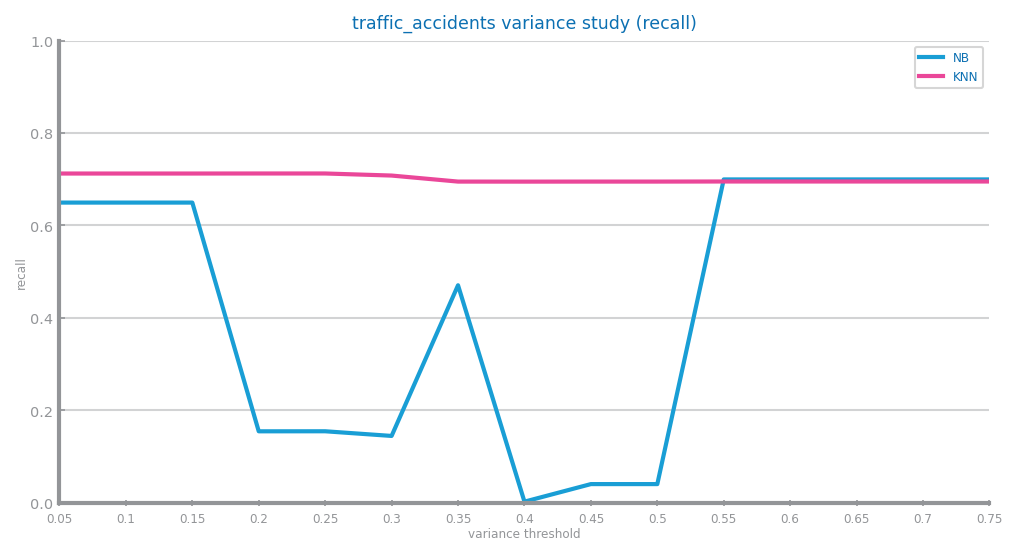

In [37]:
from math import ceil
from matplotlib.pyplot import savefig, show, figure
from dslabs_functions import HEIGHT, evaluate_approach, plot_multiline_chart

def study_variance_for_feature_selection(
    train: DataFrame,
    test: DataFrame,
    target: str = "class",
    max_threshold: float = 1,
    lag: float = 0.05,
    metric: str = "accuracy",
    file_tag: str = "",
) -> dict:
    options: list[float] = [
        round(i * lag, 3) for i in range(1, ceil(max_threshold / lag + lag))
    ]
    results: dict[str, list] = {"NB": [], "KNN": []}
    summary5: DataFrame = train.describe()
    for thresh in options:
        vars2drop: Index[str] = summary5.columns[
            summary5.loc["std"] * summary5.loc["std"] < thresh
        ]
        vars2drop = vars2drop.drop(target) if target in vars2drop else vars2drop

        train_copy: DataFrame = train.drop(vars2drop, axis=1, inplace=False)
        test_copy: DataFrame = test.drop(vars2drop, axis=1, inplace=False)
        eval: dict[str, list] | None = evaluate_approach(
            train_copy, test_copy, target=target, metric=metric
        )
        if eval is not None:
            results["NB"].append(eval[metric][0])
            results["KNN"].append(eval[metric][1])

    plot_multiline_chart(
        options,
        results,
        title=f"{file_tag} variance study ({metric})",
        xlabel="variance threshold",
        ylabel=metric,
        percentage=True,
    )
    savefig(f"images/{file_tag}_fs_low_var_{metric}_study.png")
    return results


eval_metric = "recall"

figure(figsize=(2 * HEIGHT, HEIGHT))
study_variance_for_feature_selection(
    train_df,
    test_df,
    target=target,
    max_threshold=max_threshold,
    lag=0.05,
    metric=eval_metric,
    file_tag=file_tag,
)
show()

In [8]:
import numpy as np

def select_redundant_variables(data: DataFrame, min_threshold: float = 0.90, target: str = "class") -> list:
    df = data.drop(columns=[target], errors="ignore")
    corr = df.corr().abs()
    # mask lower triangle and diagonal
    mask = np.tril(np.ones(corr.shape), k=0).astype(bool)
    upper = corr.where(~mask)
    # any column that has a correlation >= min_threshold with some earlier column
    to_drop = [col for col in upper.columns if (upper[col] >= min_threshold).any()]
    return to_drop


vars2drop: list[str] = select_redundant_variables(
    train_df, target=target, min_threshold=0.1
)
print("Variables to drop", vars2drop)

Variables to drop ['crash_hour', 'alignment_STRAIGHT AND LEVEL', 'alignment_STRAIGHT ON GRADE', 'alignment_STRAIGHT ON HILLCREST', 'traffic_control_device_NO CONTROLS', 'traffic_control_device_STOP SIGN/FLASHER', 'traffic_control_device_TRAFFIC SIGNAL', 'traffic_control_device_UNKNOWN', 'trafficway_type_ALLEY', 'trafficway_type_DIVIDED - W/MEDIAN BARRIER', 'trafficway_type_FOUR WAY', 'trafficway_type_NOT DIVIDED', 'trafficway_type_ONE-WAY', 'trafficway_type_RAMP', 'trafficway_type_UNKNOWN', 'road_defect_NO DEFECTS', 'road_defect_OTHER', 'road_defect_RUT, HOLES', 'road_defect_UNKNOWN', 'road_defect_WORN SURFACE', 'prim_contributory_cause_DISREGARDING STOP SIGN', 'prim_contributory_cause_DISREGARDING TRAFFIC SIGNALS', 'prim_contributory_cause_DISREGARDING YIELD SIGN', 'prim_contributory_cause_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)', 'prim_contributory_cause_EXCEEDING SAFE SPEED FOR CONDITIONS', 'prim_contributory_cause_FAILING TO YIELD RIGHT-OF-WAY', 

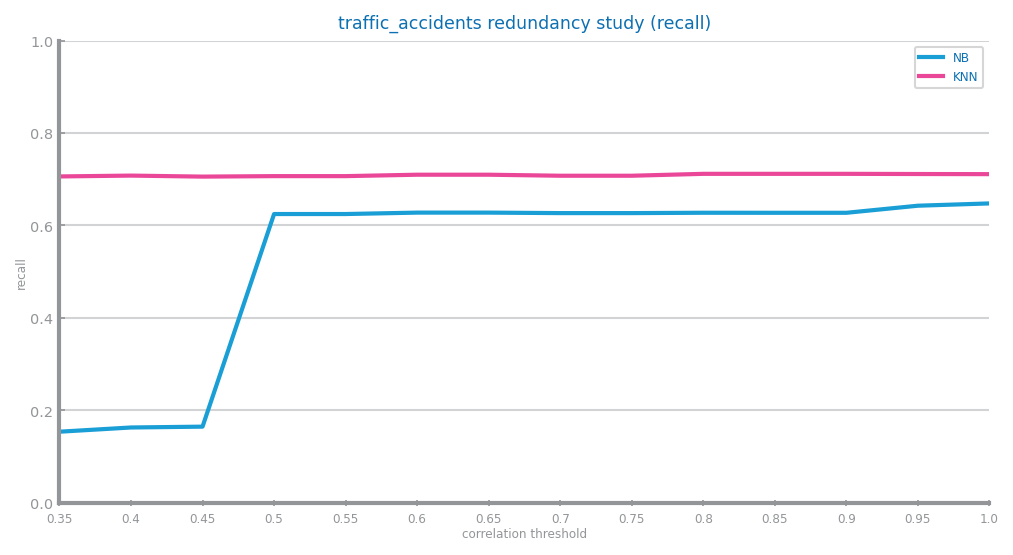

In [38]:
def study_redundancy_for_feature_selection(
    train: DataFrame,
    test: DataFrame,
    target: str = "class",
    min_threshold: float = 0.90,
    lag: float = 0.05,
    metric: str = "accuracy",
    file_tag: str = "",
) -> dict:
    options: list[float] = [
        round(min_threshold + i * lag, 3)
        for i in range(ceil((1 - min_threshold) / lag) + 1)
    ]

    df: DataFrame = train.drop(columns=[target], errors="ignore")
    corr_matrix: DataFrame = df.corr().abs()

    # mask lower triangle and diagonal -> consider only upper triangle
    mask = np.tril(np.ones(corr_matrix.shape), k=0).astype(bool)
    upper = corr_matrix.where(~mask)

    variables: Index[str] = corr_matrix.columns
    results: dict[str, list] = {"NB": [], "KNN": []}
    for thresh in options:
        # any column that has a correlation >= thresh with some earlier column
        vars2drop = [col for col in upper.columns if (upper[col] >= thresh).any()]

        train_copy: DataFrame = train.drop(vars2drop, axis=1, inplace=False)
        test_copy: DataFrame = test.drop(vars2drop, axis=1, inplace=False)
        eval: dict | None = evaluate_approach(
            train_copy, test_copy, target=target, metric=metric
        )
        if eval is not None:
            results["NB"].append(eval[metric][0])
            results["KNN"].append(eval[metric][1])

    plot_multiline_chart(
        options,
        results,
        title=f"{file_tag} redundancy study ({metric})",
        xlabel="correlation threshold",
        ylabel=metric,
        percentage=True,
    )
    savefig(f"images/{file_tag}_fs_redundancy_{metric}_study.png")
    return results

eval_metric = "recall"

figure(figsize=(2 * HEIGHT, HEIGHT))
study_redundancy_for_feature_selection(
    train_df,
    test_df,
    target=target,
    min_threshold=0.35,
    lag=0.05,
    metric=eval_metric,
    file_tag=file_tag,
)
show()

In [39]:
vars2drop: list[str] = select_low_variance_variables(train_df, 0.55, target=target)
train_cp_low, test_cp_low = apply_feature_selection(
    train_df, test_df, vars2drop, filename=f"lab3/data/{file_tag}", tag="lowvar"
)
print(f"Original data: train={train_df.shape}, test={test_df.shape}")
print(f"After redundant FS: train_cp={train_cp_low.shape}, test_cp={test_cp_low.shape}")

Original data: train=(49137, 142), test=(21059, 142)
After redundant FS: train_cp=(49137, 28), test_cp=(21059, 28)


In [ ]:
vars2drop: list[str] = select_redundant_variables(train_df, min_threshold=0.5, target=target)
train_cp_red, test_cp_red = apply_feature_selection(train_df, test_df, vars2drop, filename=f"lab3/data/{file_tag}", tag="redundant")

print(f"Original data: train={train_df.shape}, test={test_df.shape}")
print(f"After redundant FS: train_cp={train_cp_red.shape}, test_cp={test_cp_red.shape}")

Original data: train=(49137, 142), test=(21059, 142)
After redundant FS: train_cp=(49137, 130), test_cp=(21059, 130)


In [12]:
print(f"Original data: train={train_df.shape}, test={test_df.shape}")

vars2drop: list[str] = select_low_variance_variables(train_df, 0.55, target=target)
train_df, test_df = apply_feature_selection(train_df, test_df, vars2drop, filename=f"lab3/data/{file_tag}", tag="lowvar")
vars2drop: list[str] = select_redundant_variables(train_df, min_threshold=0.5, target=target)
train_df, test_df = apply_feature_selection(train_df, test_df, vars2drop, filename=f"lab3/data/{file_tag}", tag="redundant")
print(f"After FS: train_cp={train_df.shape}, test_cp={test_df.shape}")

Original data: train=(49137, 142), test=(21059, 142)
After FS: train_cp=(49137, 21), test_cp=(21059, 21)


Evaluating approach for the following configuration:
Outlier strategy: fixed (applied: True)
Scaling strategy: zscore (applied: True)
Balancing strategy: smote (applied: True)


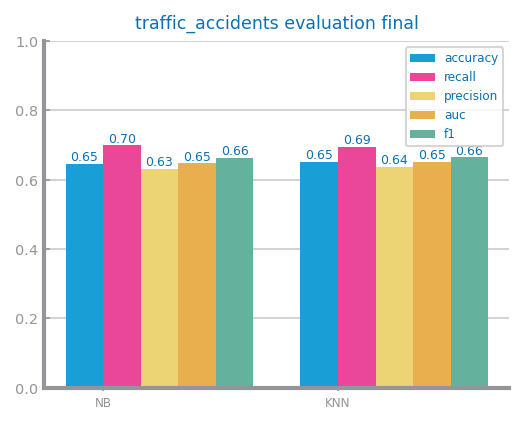

In [14]:
flags = [flag_outliers, flag_scaling, flag_balancing]
evaluate(train_df, test_df, file_tag, target, outlier_strategy, scaling_strategy, balancing_strategy, flags)

Evaluating approach for the following configuration:
Outlier strategy: fixed (applied: True)
Scaling strategy: zscore (applied: True)
Balancing strategy: smote (applied: True)


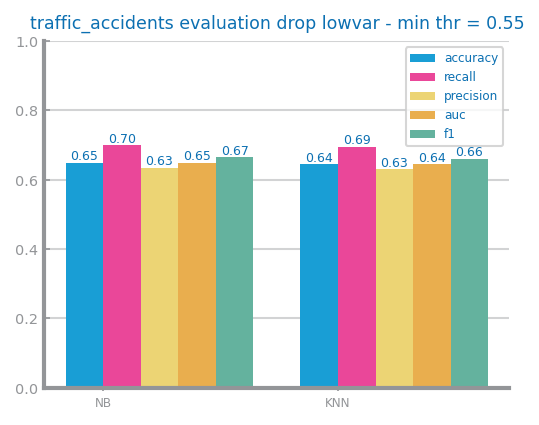

In [46]:
flags = [flag_outliers, flag_scaling, flag_balancing]
evaluate(train_cp_low, test_cp_low, file_tag, target, outlier_strategy, scaling_strategy, balancing_strategy, flags)

### Run whole pipeline

In [4]:
df = load_dataset(filename, sample=sample)
#encode target column as binary
#df[target] = df[target].apply(lambda x: 1 if x == "INJURY AND / OR TOW DUE TO CRASH" else 0)
df.drop(df.filter(regex='injur').columns, axis=1, inplace=True)
vars = get_variable_types(df)
df = data_encoding(df)

train_df, test_df = split_train_test_data(df)
train_df, flag_outliers = process_outliers(train_df, strategy=outlier_strategy)
train_df, test_df, flag_scaling = data_scaling([train_df, test_df], file_tag, target, strategy=scaling_strategy)
balanced_df, flag_balancing = data_balancing(concat([train_df, test_df]), target, strategy=balancing_strategy)
train_df, test_df = split_train_test_data(balanced_df)
flags = [flag_outliers, flag_scaling, flag_balancing]

#evaluate(train_df, test_df, file_tag, target, outlier_strategy, scaling_strategy, balancing_strategy, flags)

Loading dataset from data/traffic_accidents.csv...
Sampling 30% of the dataset for quicker processing...
Column crash_hour seems numeric but is actually symbolic.
Column crash_day_of_week seems numeric but is actually symbolic.
Column crash_month seems numeric but is actually symbolic.
Train shape: (43954, 142), Test shape: (18838, 142)
Shape of original data: (43954, 142)
Shape after performing outlier processing with fixed strategy: (43954, 142)
Train shape: (49137, 142), Test shape: (21059, 142)
